# Data analysis: Covid cases over time

Data analysis of daily new covid cases in different countries, using data from:

https://github.com/CSSEGISandData/COVID-19

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [2]:
plt.style.use("ggplot")

## Import and clean up data

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [4]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


### Remove unused columns

In [5]:
df = df.drop(["Lat", "Long"], axis=1)

In [6]:
df.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


### Make the date a column

In [7]:
df = df.melt(id_vars=["Province/State", "Country/Region"], var_name="Date", value_name="Cases")

In [8]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0


### Make values in date column proper dates

In [9]:
df.dtypes

Province/State    object
Country/Region    object
Date              object
Cases              int64
dtype: object

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Cases                      int64
dtype: object

In [12]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0


## Keep only data starting from 2021

In [13]:
df.head(5)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [14]:
df = df[df["Date"] >= pd.to_datetime("2021-01-01")]

In [15]:
df.head(5)

,Province/State,Country/Region,Date,Cases
94530,NaN,Afghanistan,2021-01-01,51526
94531,NaN,Albania,2021-01-01,58316
94532,NaN,Algeria,2021-01-01,99897
94533,NaN,Andorra,2021-01-01,8117
94534,NaN,Angola,2021-01-01,17568


### Sum provinces, aggregate to country level

In [16]:
df[(df["Country/Region"] == "United Kingdom") & 
   (df["Date"] == pd.to_datetime("2021-01-01"))]

,Province/State,Country/Region,Date,Cases
94783,Anguilla,United Kingdom,2021-01-01,13
94784,Bermuda,United Kingdom,2021-01-01,604
94785,British Virgin Islands,United Kingdom,2021-01-01,86
94786,Cayman Islands,United Kingdom,2021-01-01,338
94787,Channel Islands,United Kingdom,2021-01-01,3059
94788,Falkland Islands (Malvinas),United Kingdom,2021-01-01,29
94789,Gibraltar,United Kingdom,2021-01-01,2212
94790,Isle of Man,United Kingdom,2021-01-01,377
94791,Montserrat,United Kingdom,2021-01-01,13
94792,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,2021-01-01,4


In [17]:
df = df.groupby(["Country/Region", "Date"]).sum()

In [18]:
df.loc["United Kingdom", pd.to_datetime("2021-01-01")]

Cases    2549693
Name: (United Kingdom, 2021-01-01 00:00:00), dtype: int64

### Convert cumulative total to daily new cases

In [19]:
df.loc["Poland", :].iloc[0:5]

,Cases
Date,
2021-01-01,1305774
2021-01-02,1312780
2021-01-03,1318562
2021-01-04,1322947
2021-01-05,1330543


In [20]:
df = df.groupby(level=0).diff()

In [21]:
df.loc["Poland", :].iloc[0:5]

,Cases
Date,
2021-01-01,NaN
2021-01-02,7006.0
2021-01-03,5782.0
2021-01-04,4385.0
2021-01-05,7596.0


## Analyze

In [22]:
date_from = pd.to_datetime("2021-01-01")
date_to   = pd.to_datetime("2021-04-22")

countries = sorted([
    "Poland",
    "Czechia",
    "Germany",
    "Austria"
])

### Plot cases day by day

In [23]:
def plot_cases_day_by_day():
    (df.loc[(countries, slice(date_from, date_to)), :]
     .unstack(level=0)
     .loc[:, "Cases"]
     .plot(figsize=(16,5)))

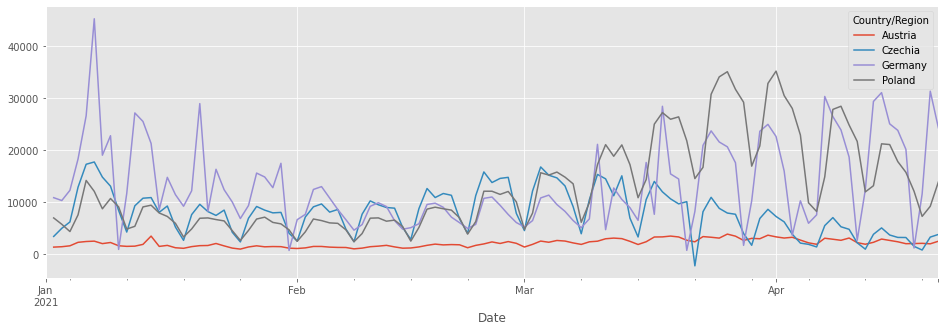

In [24]:
plot_cases_day_by_day()

### Plot cases week-by-week

In [25]:
def plot_cases_week_by_week():
    def week_start(dt):
        return dt - timedelta(days=dt.weekday())

    (df.loc[(countries, slice(date_from, date_to)), :]
     .groupby(level=0)
     .resample("1W", level=1)
     .sum()
     .unstack(level=0)
     .loc[:, "Cases"]
     .plot(figsize=(16, 5)))

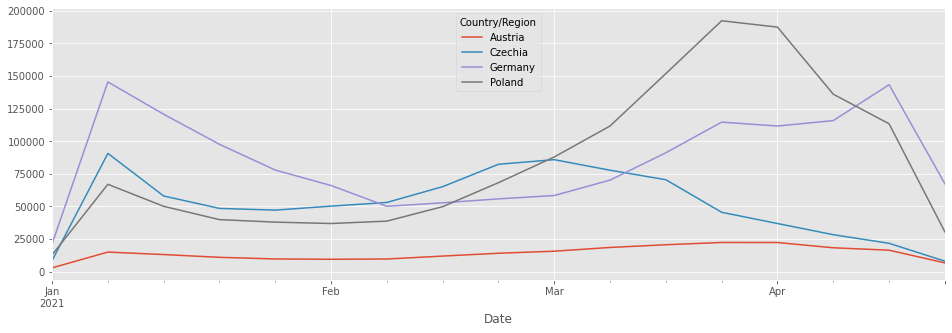

In [26]:
plot_cases_week_by_week()

### Plot moving average of cases

In [27]:
def plot_moving_average_of_cases(days):
    # To compute the moving average you need more days than will be presented
    ma_date_from = date_from - timedelta(days=days)

    (df.loc[(countries, slice(ma_date_from, date_to)), :]
     .groupby(level=0)
     # rolling() does not support multi-indexes or level argument at the moment,
     # the apply() call works around this
     .apply(lambda df: df.rolling(days).sum())
     .loc[:, "Cases"]
     .unstack(level=0)
     .plot(figsize=(16,5)))

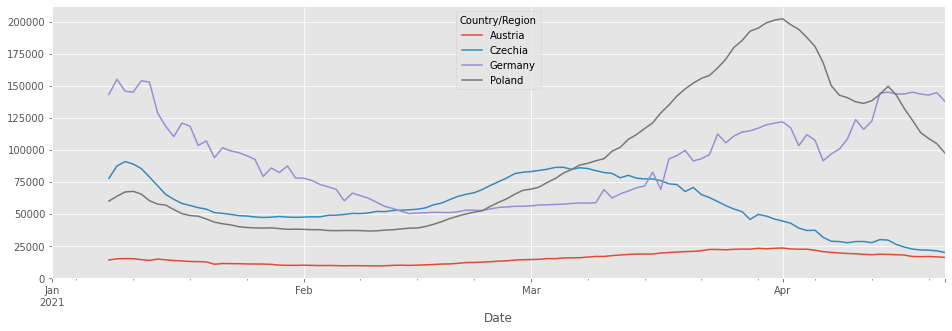

In [28]:
plot_moving_average_of_cases(days=7)